In [472]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation

In [473]:


def calculate_z_displacement(Zpos):
    """
    Calculate the z-axis displacement for each tracker and average them.
    """
    z_displacements = []
    for i in range(Zpos.shape[1]):
        # Check if the data contains nan values
        if not np.isnan(Zpos[:, i]).all():
            # Calculate the z-axis displacement for each tracker, ignoring nan values
            z_disp = np.nanmean(np.diff(Zpos[:, i]))
            z_displacements.append(z_disp)

    print("z_displacements:", z_displacements)

    # Calculate the average z-axis displacement, ignoring nan values
    avg_z_displacement = np.nanmean(z_displacements)
    return avg_z_displacement


In [474]:
def visualize_data(Xpos, Zpos, title):
    """
    Visualize the data by plotting the Xpos and Zpos for each tracker.
    """

    # Set the figure style
    plt.style.use('default')

    # Set the unified window size for the plot
    plt.figure(figsize=(12, 6))

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    for i in range(Xpos.shape[1]):
        axs[0].plot(Xpos[:, i], label=f'Tracker {i + 1}')
        axs[1].plot(Zpos[:, i], label=f'Tracker {i + 1}')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Distance')
    axs[0].legend()
    axs[0].set_title('Horizontal Move (x-axis)')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Distance')
    axs[1].legend(loc='lower left')
    axs[1].set_title('Vertical Move (z-axis)')
    plt.suptitle(title)
    plt.show()

In [475]:
# def clean_data(Xpos, Zpos, valid_threshold):
#     """
#     Clean the data by removing trackers with insufficient valid data.
#     """
#     valid_trackers = [i for i in range(Xpos.shape[1]) if np.count_nonzero(~np.isnan(Xpos[:, i])) >= valid_threshold]
#     Xpos = Xpos[:, valid_trackers]
#     Zpos = Zpos[:, valid_trackers]
#     return Xpos, Zpos

In [476]:
# def clean_and_crop_data(Xpos, Zpos, valid_threshold, crop_threshold):
#     """
#     Clean the data by removing trackers with insufficient valid data and 
#     then crop the data to remove almost unchanged values at the start and end.
#     """
#     # Clean the data
#     valid_trackers = [i for i in range(Xpos.shape[1]) if np.count_nonzero(~np.isnan(Xpos[:, i])) >= valid_threshold]
#     Xpos = Xpos[:, valid_trackers]
#     Zpos = Zpos[:, valid_trackers]

#     # Crop the data
#     first_changed_idx = np.where(np.abs(np.diff(Xpos)) > crop_threshold)[0][0]
#     last_changed_idx = np.where(np.abs(np.diff(Xpos)) > crop_threshold)[0][-1]
    
#     Xpos_cropped = Xpos[first_changed_idx:last_changed_idx]
#     Zpos_cropped = Zpos[first_changed_idx:last_changed_idx]

#     return Xpos_cropped, Zpos_cropped


In [477]:
def crop_data(Xpos, Zpos, crop_start, crop_end):
    """
    Crop the data to remove the useless data at the start and end of the tracking.
    """
    Xpos_cropped = Xpos[crop_start:crop_end, :]
    Zpos_cropped = Zpos[crop_start:crop_end, :]
    return Xpos_cropped, Zpos_cropped

In [478]:
def clean_data(Xpos, Zpos, valid_threshold, crop_start, crop_end):
    """
    Clean the data by removing trackers with insufficient valid data and crop out useless data at the start and end.
    """
    valid_trackers = [i for i in range(Xpos.shape[1]) if np.count_nonzero(~np.isnan(Xpos[:, i])) >= valid_threshold]
    Xpos = Xpos[:, valid_trackers]
    Zpos = Zpos[:, valid_trackers]

    # Crop out the useless data at the start and end of tracking
    Xpos, Zpos = crop_data(Xpos, Zpos, crop_start, crop_end)

    return Xpos, Zpos

In [479]:
def main():
    mat_file = 'James_75_1.0_0.8_trial_1.mat'

    # Load data from the .mat file into a Python dictionary
    data = loadmat(mat_file)
    
    # Extract the variables Xpos, Ypos, and Zpos from the dictionary
    Xpos = data['Xpos']
    Ypos = data['Ypos']
    Zpos = data['Zpos']

    # Visualize the original data
    visualize_data(Xpos, Zpos, title='Original Data')

    # Set the valid data threshold (adjust this value as needed)
    valid_threshold = 100

    # Set the number of frames to crop from the start and end
    crop_start = 450
    crop_end = -1750  # Use negative value to count from the end

    # Clean the data by removing trackers with insufficient valid data and crop out useless data
    Xpos, Zpos = clean_data(Xpos, Zpos, valid_threshold, crop_start, crop_end)

    # Calculate and print the average x-axis displacement for each tracker
    avg_x_displacement = calculate_x_displacement(Xpos)
    print("Average X-Axis Displacement:", avg_x_displacement)

    # Visualize the cleaned data
    visualize_data(Xpos, Zpos, title='After Data Cleaning')

<Figure size 1200x600 with 0 Axes>

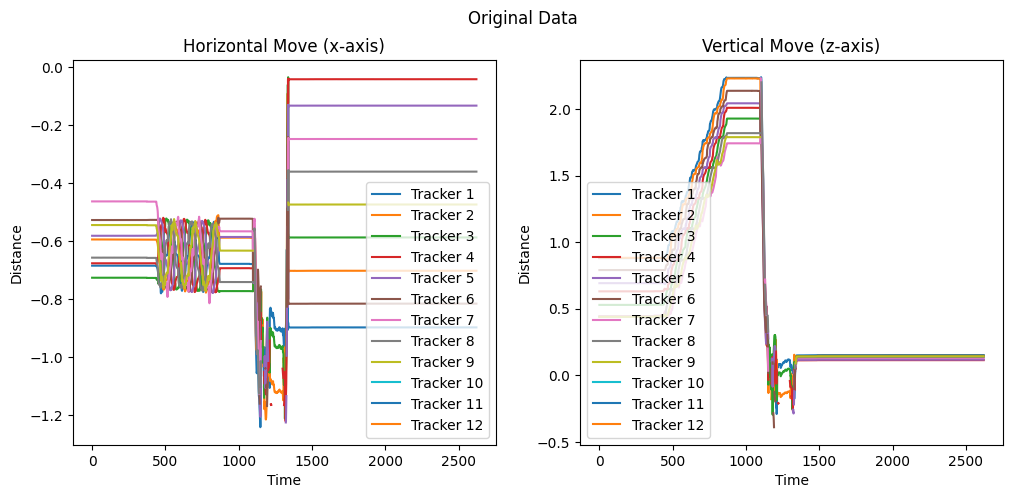

x_displacements: [7.367105778492545e-05, 8.323243564777872e-05, -7.322423531720304e-05, -9.419954870772192e-05, -8.558391675246867e-05, 1.979482995076304e-05, -7.90339184486951e-05, -4.999569645969998e-05, -5.4181329994473494e-05]
Average X-Axis Displacement: -2.8835591366310556e-05


<Figure size 1200x600 with 0 Axes>

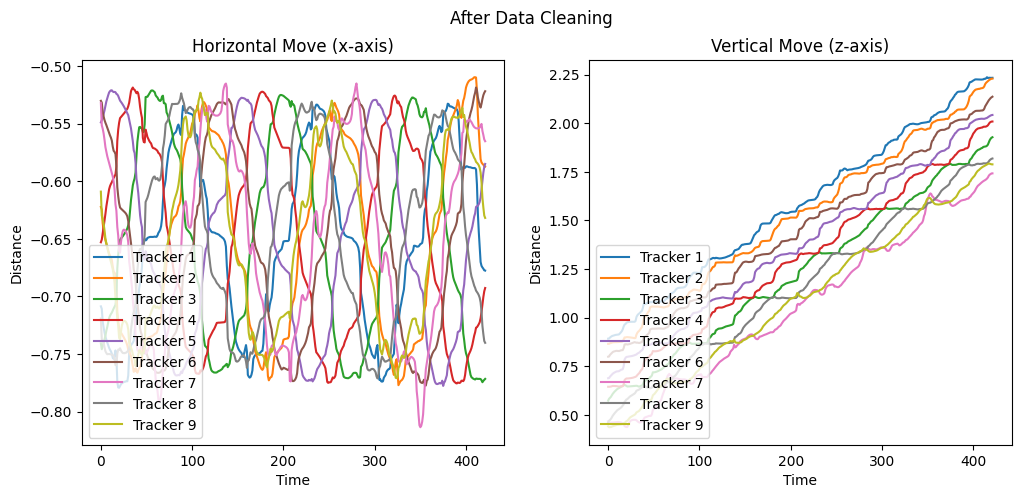

In [480]:
if __name__ == "__main__":
    main()